In [22]:
import numpy as np
import pandas as pd
from collections import Counter

In [23]:
df=pd.read_csv(r"C:\Users\prabh\Downloads\data\listing_with_id.csv")

In [24]:
# Convert month column to the desired format (YYYY-MM-DD)
df['month'] = pd.to_datetime(df['month'], format='%Y-%m-%d')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248508 entries, 0 to 248507
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              248508 non-null  int64         
 1   accommodates                    248508 non-null  int64         
 2   bathrooms_text                  248376 non-null  float64       
 3   bedrooms                        246462 non-null  float64       
 4   beds                            248308 non-null  float64       
 5   price                           248470 non-null  float64       
 6   minimum_nights                  248508 non-null  int64         
 7   maximum_nights                  248508 non-null  int64         
 8   minimum_nights_avg_ntm          248508 non-null  float64       
 9   maximum_nights_avg_ntm          248508 non-null  float64       
 10  availability_30                 248508 non-null  int64  

In [26]:
# Count the occurrences of each id
id_counts = df['id'].value_counts()

# Now count the occurrences of those counts
count_counts = Counter(id_counts.values)

# Print the results
print("ID counts:", id_counts)
print("Count of counts:", count_counts)

ID counts: id
1419                   12
591207290192401504     12
591369137852604608     12
591397142894564511     12
591842200761146274     12
                       ..
1236909153245922872     1
1236847415192350469     1
1047050436086963691     1
1050981754623499159     1
993329579328605342      1
Name: count, Length: 32128, dtype: int64
Count of counts: Counter({12: 13068, 1: 3472, 2: 2703, 3: 2091, 4: 1893, 6: 1621, 5: 1501, 7: 1258, 8: 1225, 11: 1185, 10: 1098, 9: 1013})


In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [28]:
# Define your dataframe 'df' here

# Create 'Price_Range' column
bins = [0, 150, 300, 500, 1000, df['price'].max()]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['Price_Range'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

# Split the dataset into five DataFrames
df_1 = df[df['Price_Range'] == 'Very Low']
df_2 = df[df['Price_Range'] == 'Low']
df_3 = df[df['Price_Range'] == 'Medium']
df_4 = df[df['Price_Range'] == 'High']
df_5 = df[df['Price_Range'] == 'Very High']

# You can store these DataFrames in a dictionary for convenience
price_range_dfs = {
  'Very Low': df_1,
  'Low': df_2,
  'Medium': df_3,
  'High': df_4,
  'Very High': df_5
}


Processing Price Range: Very Low


C:\Users\prabh\AppData\Local\Temp\ipykernel_12824\377522451.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])
C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 52.8957 - val_loss: 27.1644
Epoch 2/10
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 27.2404 - val_loss: 21.6178
Epoch 3/10
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 20.7124 - val_loss: 20.0604
Epoch 4/10
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 19.9288 - val_loss: 19.6515
Epoch 5/10
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 19.4839 - val_loss: 19.9061
Epoch 6/10
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 19.2807 - val_loss: 19.2881
Epoch 7/10
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 19.1045 - val_loss: 19.2503
Epoch 8/10
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 18.8993 - val_loss: 19.2449
Epoch 9/10
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 18.7383 - val_loss: 19.0303
Epoch 10/10
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 18.7357 - val_loss: 18.9551
530/530 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Evaluation Metrics:
RMSE: 24.45920399217249
MAE: 1

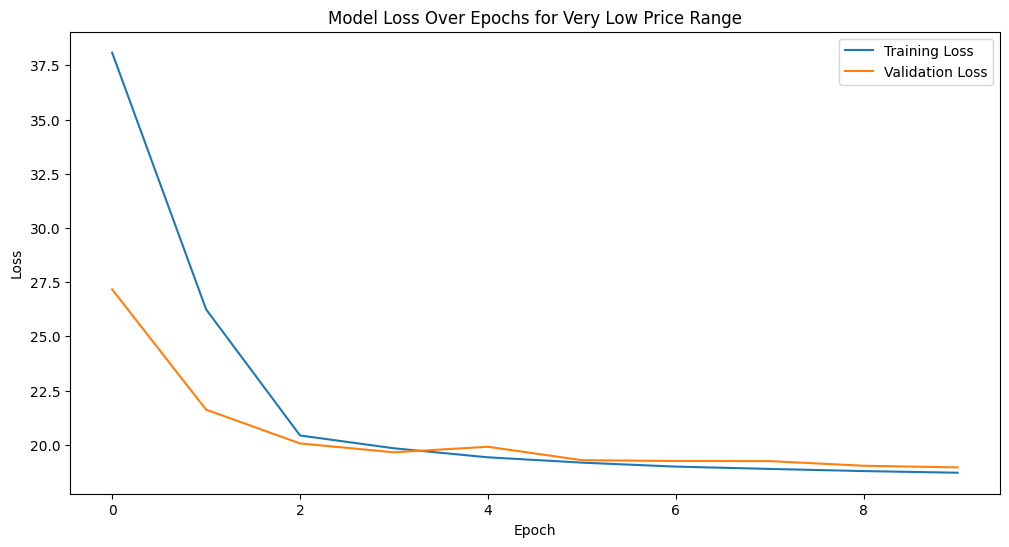

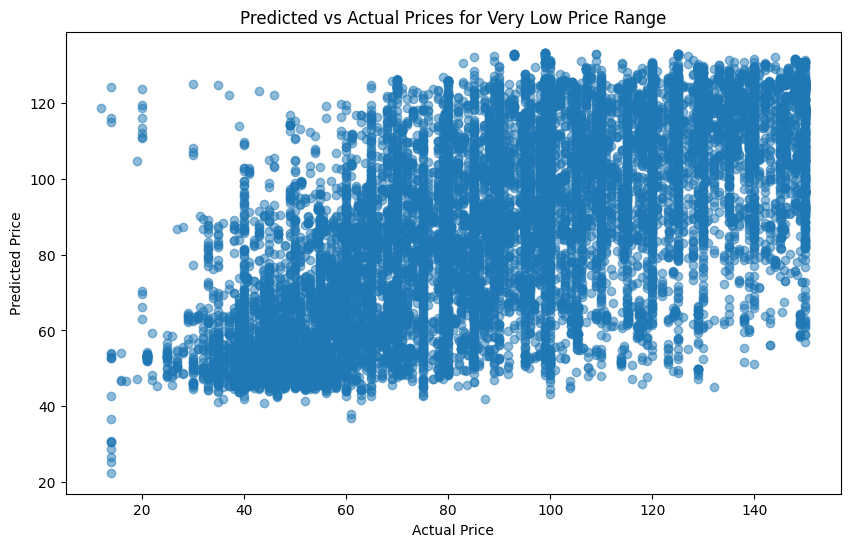


Processing Price Range: Low


C:\Users\prabh\AppData\Local\Temp\ipykernel_12824\377522451.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/10


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1045/1045 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 186.0104 - val_loss: 128.6918
Epoch 2/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 111.7904 - val_loss: 60.1340
Epoch 3/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 50.5475 - val_loss: 36.4730
Epoch 4/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 35.6932 - val_loss: 34.8392
Epoch 5/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 35.0688 - val_loss: 34.7940
Epoch 6/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 35.1514 - val_loss: 34.7780
Epoch 7/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 34.9105 - val_loss: 33.2440
Epoch 8/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 33.3373 - val_loss: 32.8344
Epoch 9/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 32.9647 - val_loss: 32.6642
Epoch 10/10
1045/1045 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 32.9485 - val_loss: 32.6046
262/262 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Evaluation Metrics:
RMSE: 39.61217513186953
MAE: 32.60459676744726

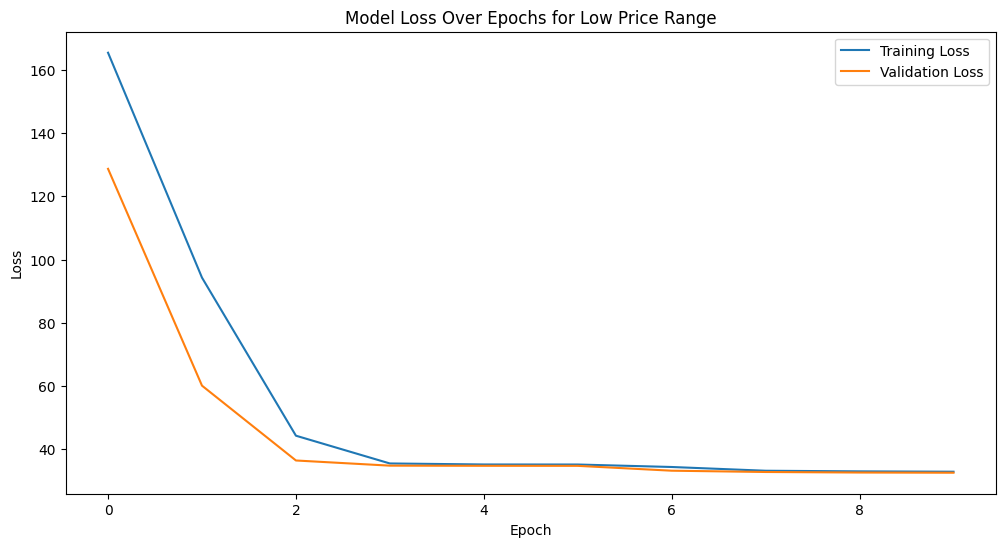

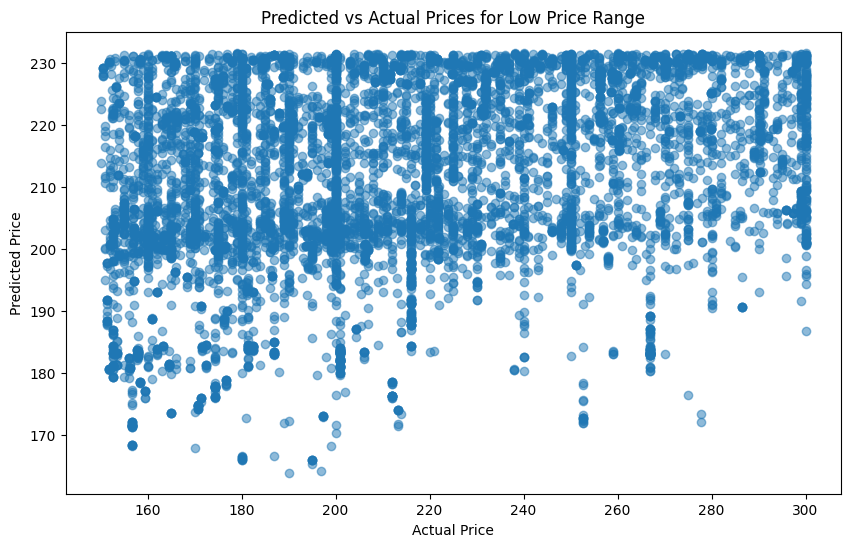


Processing Price Range: Medium


C:\Users\prabh\AppData\Local\Temp\ipykernel_12824\377522451.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/10


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 380.2335 - val_loss: 363.7777
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 356.5838 - val_loss: 347.4518
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 341.8016 - val_loss: 331.8164
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 325.3336 - val_loss: 316.4368
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 308.9957 - val_loss: 301.1964
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 294.8262 - val_loss: 286.0466
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 279.2710 - val_loss: 270.9604
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 264.9530 - val_loss: 255.9207
Epoch 9/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 249.1855 - val_loss: 240.9156
Epoch 10/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 233.4938 - val_loss: 225.9370
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Evaluation Metrics:
RMSE: 234.10468825727548
MAE: 225.937034637338
R2 S

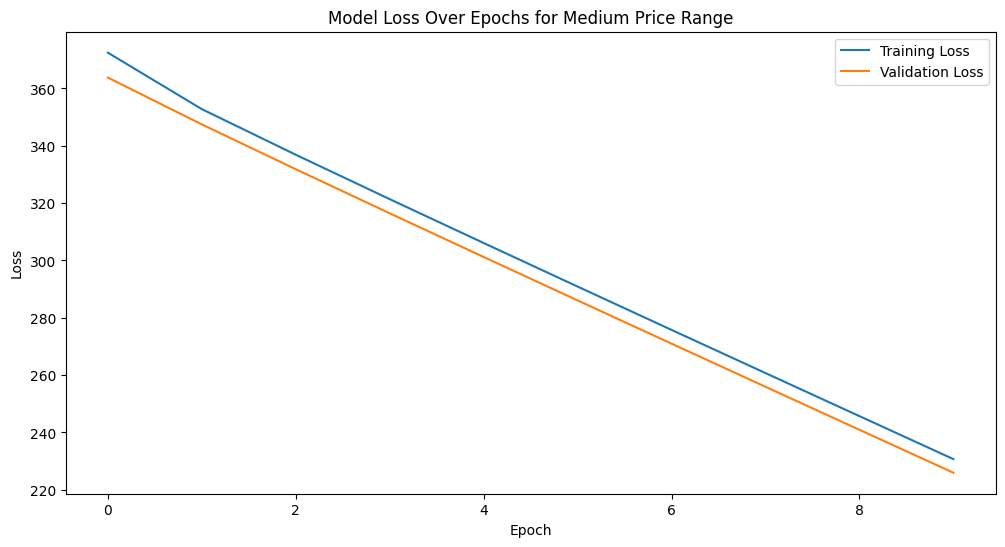

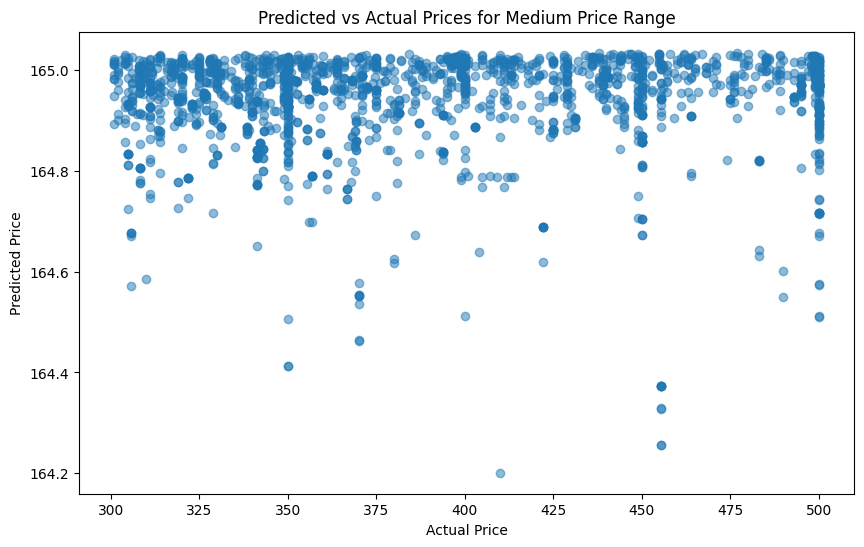


Processing Price Range: High


C:\Users\prabh\AppData\Local\Temp\ipykernel_12824\377522451.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/10


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 696.9982 - val_loss: 693.1608
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 676.7704 - val_loss: 684.8657
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 669.6645 - val_loss: 677.8708
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 662.6967 - val_loss: 671.2254
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 662.5565 - val_loss: 664.7465
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 651.8431 - val_loss: 658.3670
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 648.0276 - val_loss: 652.0538
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 641.1961 - val_loss: 645.7878
Epoch 9/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 627.8867 - val_loss: 639.5575
Epoch 10/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 626.5404 - val_loss: 633.3549
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Evaluation Metrics:
RMSE: 650.1807175462512
MAE: 633.3549464098637
R2 Score: -18.575914602

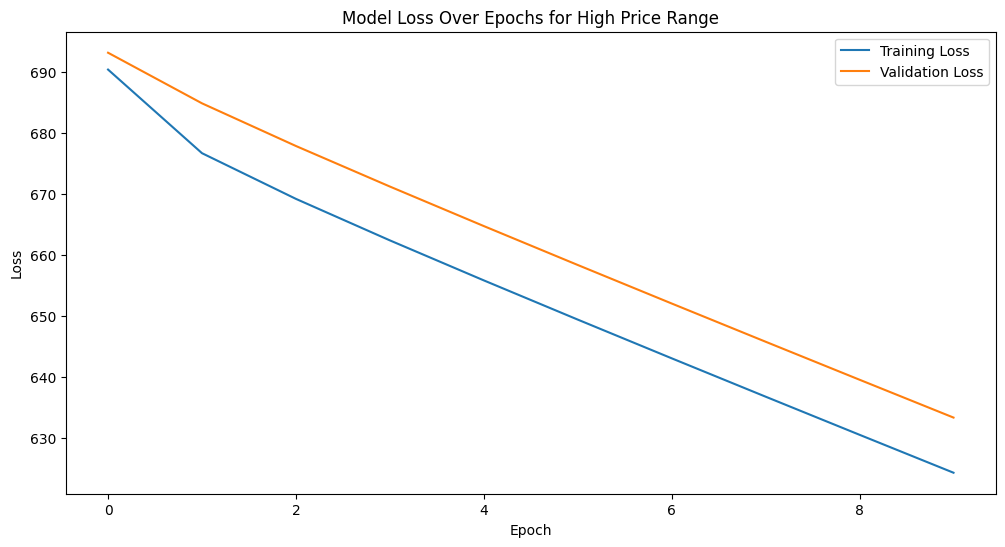

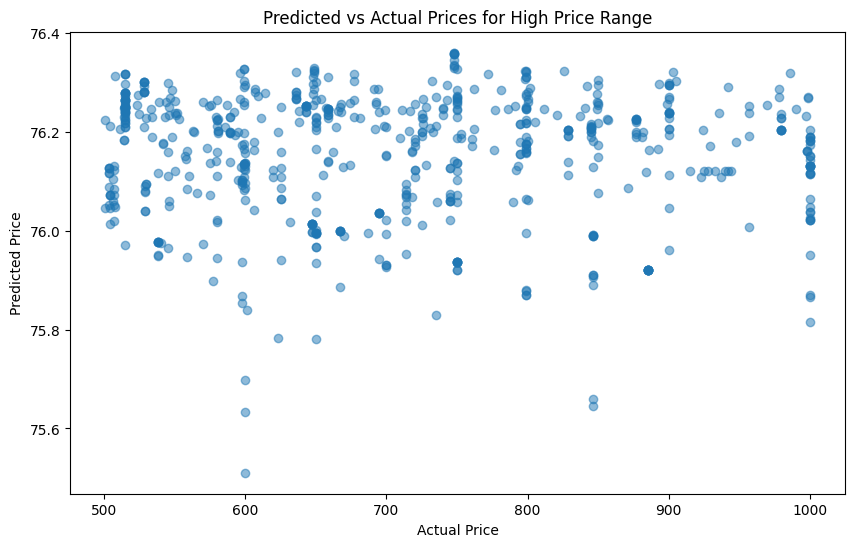


Processing Price Range: Very High


C:\Users\prabh\AppData\Local\Temp\ipykernel_12824\377522451.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.to_datetime(df['month'])


Epoch 1/10


C:\Users\prabh\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 2544.4441 - val_loss: 1902.8574
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2493.6428 - val_loss: 1899.3237
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2514.0801 - val_loss: 1893.6096
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2422.1597 - val_loss: 1889.7910
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2452.8164 - val_loss: 1887.3081
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2348.3352 - val_loss: 1885.2291
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2359.2549 - val_loss: 1883.3252
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2423.6030 - val_loss: 1881.5209
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2515.5938 - val_loss: 1879.7808
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2506.7654 - val_loss: 1878.0862
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
Evaluation Metrics:
RMSE: 2008.4051823890586
MAE: 1878.0862648242019
R2

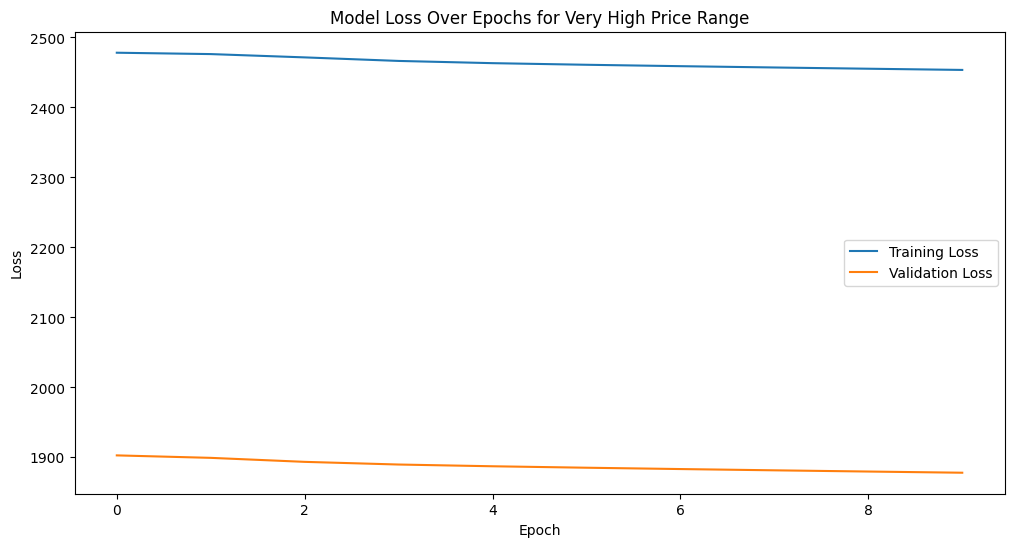

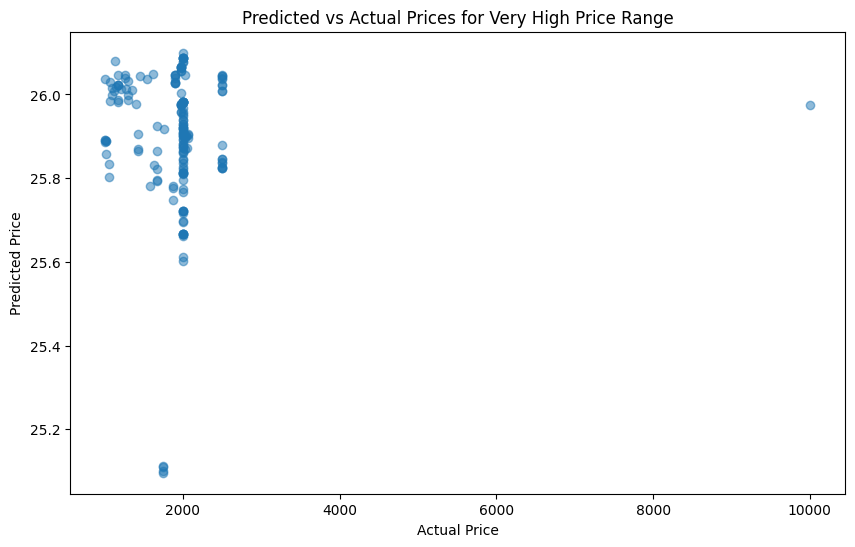

In [33]:
features = [
  'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
  'minimum_nights', 'maximum_nights', 'minimum_nights_avg_ntm',
  'maximum_nights_avg_ntm', 'availability_30', 'number_of_reviews',
  'review_scores_rating', 'instant_bookable', 'calculated_host_listings_count',
  'property', 'new_host', 'host_response_score', 'host_score',
  'property_description_score', 'count_amenities'
]
target = 'price'
sequence_length = 3  # Using previous 3 months to predict the next month

def create_sequences(df, mean_feature_values):
  X_sequences = []
  y_targets = []
  
  grouped = df.groupby('id')
  
  for name, group in grouped:
      group = group.sort_values('month')
      X = group[features].values
      y = group[target].values
      
      for i in range(len(X)):
          end_ix = i + sequence_length
          if end_ix >= len(X):
              break
          seq_X = X[i:end_ix]
          seq_y = y[end_ix]
          if seq_X.shape[0] < sequence_length:
              # Pad with mean feature values
              padding = np.tile(mean_feature_values, (sequence_length - seq_X.shape[0], 1))
              seq_X = np.vstack((padding, seq_X))
          X_sequences.append(seq_X)
          y_targets.append(seq_y)
  
  X = np.array(X_sequences)
  y = np.array(y_targets)
  
  return X, y

def preprocess_and_create_sequences(df, price_range_label):
  # Ensure 'month' is datetime
  df['month'] = pd.to_datetime(df['month'])
  
  # Drop rows with missing values
  df = df.dropna(subset=[target] + features)
  
  # Sort by 'id' and 'month'
  df = df.sort_values(['id', 'month'])
  
  # Encode 'property' if necessary
  if df['property'].dtype == 'object':
      df['property'] = df['property'].astype('category').cat.codes
  
  # Scale features (but not the target variable)
  scaler = MinMaxScaler()
  df[features] = scaler.fit_transform(df[features])
  
  # Split data into training and validation before computing mean
  grouped = df.groupby('id')
  ids = df['id'].unique()
  train_ids, val_ids = train_test_split(ids, test_size=0.2, random_state=42)
  
  df_train = df[df['id'].isin(train_ids)]
  df_val = df[df['id'].isin(val_ids)]
  
  # Compute mean feature values from training data only
  mean_feature_values = df_train[features].mean().values
  
  # Create sequences
  X_train, y_train = create_sequences(df_train, mean_feature_values)
  X_val, y_val = create_sequences(df_val, mean_feature_values)
  
  return X_train, y_train, X_val, y_val

def build_and_train_model(X_train, y_train, X_val, y_val):
  model = Sequential()
  # Removed Masking layer since we're padding with mean feature values
  model.add(LSTM(64, input_shape=(sequence_length, X_train.shape[2])))
  model.add(Dense(1))
  
  model.compile(loss='mae', optimizer='adam')
  
  early_stopping = tf.keras.callbacks.EarlyStopping(
      monitor='val_loss', patience=5, restore_best_weights=True
  )
  
  history = model.fit(
      X_train, y_train,
      epochs=10,
      batch_size=32,
      validation_data=(X_val, y_val),
      callbacks=[early_stopping],
      verbose=1
  )
  
  return model, history

# Process each price range
results = {}

for price_range, df_price_range in price_range_dfs.items():
  print(f"\nProcessing Price Range: {price_range}")
  
  # Preprocess data and create sequences with mean padding
  X_train, y_train, X_val, y_val = preprocess_and_create_sequences(df_price_range, price_range)
  
  # Check if there is enough data to build a model
  if X_train.shape[0] < 10:
      print(f"Not enough data to build a model for price range {price_range}.")
      continue
  
  # Build and train model
  model, history = build_and_train_model(X_train, y_train, X_val, y_val)
  
  # Make predictions
  y_pred = model.predict(X_val)
  
  # Evaluate the model
  rmse = np.sqrt(mean_squared_error(y_val, y_pred))
  mae = mean_absolute_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)
  
  print("Evaluation Metrics:")
  print(f"RMSE: {rmse}")
  print(f"MAE: {mae}")
  print(f"R2 Score: {r2}")
  
  # Store results
  results[price_range] = {
      'model': model,
      'history': history,
      'rmse': rmse,
      'mae': mae,
      'r2_score': r2,
      'X_val': X_val,
      'y_val': y_val,
      'y_pred': y_pred
  }
  
  # Plot training history
  plt.figure(figsize=(12,6))
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title(f'Model Loss Over Epochs for {price_range} Price Range')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend()
  plt.show()
  
  # Plot predicted vs actual prices
  plt.figure(figsize=(10,6))
  plt.scatter(y_val, y_pred, alpha=0.5)
  plt.xlabel('Actual Price')
  plt.ylabel('Predicted Price')
  plt.title(f'Predicted vs Actual Prices for {price_range} Price Range')
  plt.show()
